## Dacon 영화 관객수 예측 모델 개발 EDA
* box_off_num을 예측해야함 (target값)

#### 라이브러리 import 및 데이터 load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
data = pd.read_csv("data/movies_train.csv")

In [3]:
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


#### pd.decribe()

* 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

* 기술통계량이란?
 * 해당 column을 대표할 수 있는 통계값들을 의미
* 기술통계량 종류
 * count: 해당 column에서 비어 있지 않은 값의 개수
 * mean: 평균
 * std: 표준편차
 * min: 최솟값 (이상치 포함)
 * 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 * 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 * 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 * max: 최댓값 (이상치 포함)
* 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
 * 아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
 * 위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
 * IQRIQR = Q_3 - Q_1Q3​−Q1​

In [5]:
data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


### 결측치(Nan, null)처리
---


#### pd.isnull()
* null 확인
 * dir_prev_bfnum 만들기 전 영화 관객수  
 
 
#### pd.dropna(axis=1)
 * null값 있는 열 삭제(axis=1은 열 row를 삭제한다는 뜻)
 * 추가적으로 thresh = num은 Nan값이 num이상인 row, col만 삭제함  
 
 
#### pd.fillna(num, inplace = True)
 * 결측치를 num으로 대체함  

In [6]:
data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [7]:
#dir_prev_bfnum row가 삭제되었다.
data = data.dropna(axis=1)
data.isnull().sum()

title            0
distributor      0
genre            0
release_time     0
time             0
screening_rat    0
director         0
dir_prev_num     0
num_staff        0
num_actor        0
box_off_num      0
dtype: int64

#### sns.heatmap
* heatmap을 통해 두 개의 카테고리 값에 대한 변화를 확인
* float값만 할 수 있는듯?
* title이 str이라서 오류가 남.
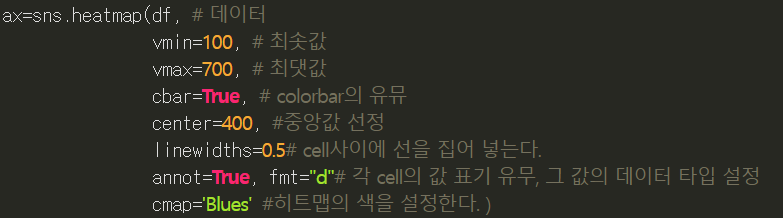

#### df.drop()
* axis 파라미터를 통해 row, col 지정가능(axis = 1 이면 row에 대해서 drop)

#### df.corr()
* 상관관계 분석함
* 주의할 점
 * 연속형(float, int) 데이터에 대해서만 상관관계 분석
 * -1 ~ 1까지의 값으로 상관관계 크기를 보여줌(양수이면 하나가 비례, 음수이면 반비례)
 * **상관관계가 인과관계를 의미하지 않는다**
 
#### 결과
* num_staff 정도만 target값에 영향을 미치는 듯 하다.
* drop한 row가 너무 많아서 제대로 분석이 진행된 것 같지는 않다.

<AxesSubplot:title={'center':'Features'}>

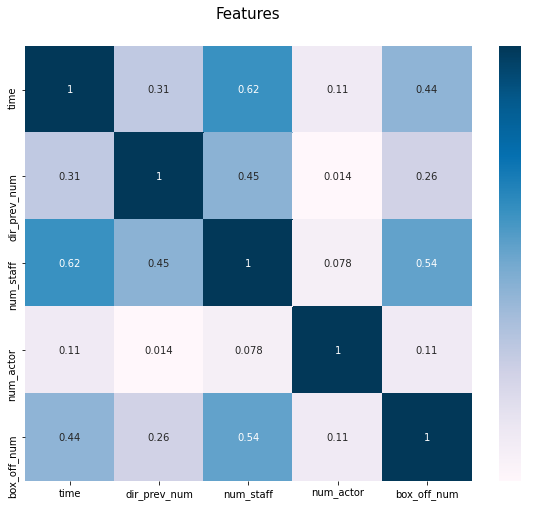

In [8]:
data_drop_str = data.drop(['title',
                           'distributor',
                           'genre',
                           'release_time',
                           'screening_rat',
                           'director']
                           ,axis=1)

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Features", y = 1.05, size = 15)
plt.style.use(['dark_background'])
sns.heatmap(data_drop_str.corr(), cmap = colormap,annot=True,)

#### 너무 drop되는 데이터가 많은 것 같음.
* 버려지는 데이터가 많아 상관 관계가 분석이 잘 된것 같지 않음
* labeling을 해보자!!!  


#### df.value_counts()
* 값별로 데이터의 수 출력. 고윳값과 그 수를 출력해서 쓰기 편하다.


In [9]:
data['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [10]:
data['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [11]:
dict(data['distributor'].value_counts(ascending = True))


{'위드시네마': 1,
 '씨네굿필름': 1,
 '(주)노버스엔터테인먼트': 1,
 '(주)피터팬픽쳐스': 1,
 '조이앤컨텐츠그룹': 1,
 '유니버설픽쳐스인터내셔널코리아': 1,
 '아방가르드 필름': 1,
 '에이블엔터테인먼트': 1,
 '(주)패스파인더씨앤씨': 1,
 '제나두 엔터테인먼트': 1,
 '건시네마': 1,
 'tvN': 1,
 '사람과 사람들': 1,
 'M2픽처스': 1,
 '동국대학교 충무로영상제작센터': 1,
 '스토리셋': 1,
 'SK텔레콤(주)': 1,
 '롤러코스터 프로덕션': 1,
 '(주)스마일이엔티': 1,
 '(주)예지림 엔터테인먼트': 1,
 '와이드릴리즈(주)': 1,
 '더 피플': 1,
 '케이엠스타': 1,
 '(주)레인보우 팩토리': 1,
 '(주)팝 파트너스': 1,
 '영희야놀자': 1,
 '(주)유비콘텐츠': 1,
 'CJ CGV': 1,
 '(주)씨엠닉스': 1,
 '판씨네마(주)': 1,
 '주머니필름': 1,
 '한국YWCA연합회': 1,
 '위더스필름': 1,
 '(주)대명문화공장': 1,
 'THE 픽쳐스': 1,
 '스튜디오 블루': 1,
 '(주)에이원 엔터테인먼트': 1,
 '싸이더스 FNH': 1,
 '쟈비스미디어': 1,
 '프리비젼 엔터테인먼트': 1,
 '(주)로드하우스': 1,
 '팜코리아미디어': 1,
 '(주)온비즈넷': 1,
 '(주)아이필름코퍼레이션': 1,
 'ysfilm': 1,
 '보람엔터테인먼트': 1,
 '더픽쳐스/(주)마운틴픽쳐스': 1,
 '(주)패뷸러스': 1,
 '고구마공작소': 1,
 '어썸 피플': 1,
 'KBS미디어(주)': 1,
 '나우콘텐츠': 1,
 '와이드 릴리즈(주)': 1,
 '이상우필름': 1,
 '(주)JK필름': 1,
 '새인컴퍼니': 1,
 '오퍼스픽쳐스': 1,
 '디 씨드': 1,
 '상구네 필름': 1,
 '영화사 조아': 1,
 '스크린조이': 1,
 'CGV 무비꼴라쥬': 1,
 '마법사필름': 1,
 '프로젝트 엠피': 1

#### 라벨링 할 데이터 
* distributor ( 5개 이하는 무시?)
* genre
* release
* screening_rat

#### 하지 않은 데이터
* title : 모두 제목이 달라서 의미 없음
* director : title과 같은 이유

In [12]:
drop_data = data.drop(['title', 'director'], axis = 1)

In [13]:
drop_data.head()

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,1,251,2,483387


#### map을 이용하여 labeling
* release_time, distributor

#### 딕셔너리 + map
---
#### map(함수, 순차적 자료) 
  * Series.map(dic)
  * 여기서 dic은 사전으로 maping

#### df.insert(loc, colum, value, all_duplicates)
  * loc : 삽입위치 설정(0~index)
  * colum : 새 row의 레이블
  * value : 새 열의 값(map)
  * allow_duplicates : 두 열이 같을 수 있는지 여부

In [14]:
dis_dic = dict(data['distributor'].value_counts(ascending = True))
dis_dic

{'위드시네마': 1,
 '씨네굿필름': 1,
 '(주)노버스엔터테인먼트': 1,
 '(주)피터팬픽쳐스': 1,
 '조이앤컨텐츠그룹': 1,
 '유니버설픽쳐스인터내셔널코리아': 1,
 '아방가르드 필름': 1,
 '에이블엔터테인먼트': 1,
 '(주)패스파인더씨앤씨': 1,
 '제나두 엔터테인먼트': 1,
 '건시네마': 1,
 'tvN': 1,
 '사람과 사람들': 1,
 'M2픽처스': 1,
 '동국대학교 충무로영상제작센터': 1,
 '스토리셋': 1,
 'SK텔레콤(주)': 1,
 '롤러코스터 프로덕션': 1,
 '(주)스마일이엔티': 1,
 '(주)예지림 엔터테인먼트': 1,
 '와이드릴리즈(주)': 1,
 '더 피플': 1,
 '케이엠스타': 1,
 '(주)레인보우 팩토리': 1,
 '(주)팝 파트너스': 1,
 '영희야놀자': 1,
 '(주)유비콘텐츠': 1,
 'CJ CGV': 1,
 '(주)씨엠닉스': 1,
 '판씨네마(주)': 1,
 '주머니필름': 1,
 '한국YWCA연합회': 1,
 '위더스필름': 1,
 '(주)대명문화공장': 1,
 'THE 픽쳐스': 1,
 '스튜디오 블루': 1,
 '(주)에이원 엔터테인먼트': 1,
 '싸이더스 FNH': 1,
 '쟈비스미디어': 1,
 '프리비젼 엔터테인먼트': 1,
 '(주)로드하우스': 1,
 '팜코리아미디어': 1,
 '(주)온비즈넷': 1,
 '(주)아이필름코퍼레이션': 1,
 'ysfilm': 1,
 '보람엔터테인먼트': 1,
 '더픽쳐스/(주)마운틴픽쳐스': 1,
 '(주)패뷸러스': 1,
 '고구마공작소': 1,
 '어썸 피플': 1,
 'KBS미디어(주)': 1,
 '나우콘텐츠': 1,
 '와이드 릴리즈(주)': 1,
 '이상우필름': 1,
 '(주)JK필름': 1,
 '새인컴퍼니': 1,
 '오퍼스픽쳐스': 1,
 '디 씨드': 1,
 '상구네 필름': 1,
 '영화사 조아': 1,
 '스크린조이': 1,
 'CGV 무비꼴라쥬': 1,
 '마법사필름': 1,
 '프로젝트 엠피': 1

In [15]:
label = 0
for key in dis_dic:
    if dis_dic[key] <= 5:
        dis_dic[key] = label
    
    else:
        label += 1
        dis_dic[key] = label
        

In [16]:
dis_dic

{'위드시네마': 0,
 '씨네굿필름': 0,
 '(주)노버스엔터테인먼트': 0,
 '(주)피터팬픽쳐스': 0,
 '조이앤컨텐츠그룹': 0,
 '유니버설픽쳐스인터내셔널코리아': 0,
 '아방가르드 필름': 0,
 '에이블엔터테인먼트': 0,
 '(주)패스파인더씨앤씨': 0,
 '제나두 엔터테인먼트': 0,
 '건시네마': 0,
 'tvN': 0,
 '사람과 사람들': 0,
 'M2픽처스': 0,
 '동국대학교 충무로영상제작센터': 0,
 '스토리셋': 0,
 'SK텔레콤(주)': 0,
 '롤러코스터 프로덕션': 0,
 '(주)스마일이엔티': 0,
 '(주)예지림 엔터테인먼트': 0,
 '와이드릴리즈(주)': 0,
 '더 피플': 0,
 '케이엠스타': 0,
 '(주)레인보우 팩토리': 0,
 '(주)팝 파트너스': 0,
 '영희야놀자': 0,
 '(주)유비콘텐츠': 0,
 'CJ CGV': 0,
 '(주)씨엠닉스': 0,
 '판씨네마(주)': 0,
 '주머니필름': 0,
 '한국YWCA연합회': 0,
 '위더스필름': 0,
 '(주)대명문화공장': 0,
 'THE 픽쳐스': 0,
 '스튜디오 블루': 0,
 '(주)에이원 엔터테인먼트': 0,
 '싸이더스 FNH': 0,
 '쟈비스미디어': 0,
 '프리비젼 엔터테인먼트': 0,
 '(주)로드하우스': 0,
 '팜코리아미디어': 0,
 '(주)온비즈넷': 0,
 '(주)아이필름코퍼레이션': 0,
 'ysfilm': 0,
 '보람엔터테인먼트': 0,
 '더픽쳐스/(주)마운틴픽쳐스': 0,
 '(주)패뷸러스': 0,
 '고구마공작소': 0,
 '어썸 피플': 0,
 'KBS미디어(주)': 0,
 '나우콘텐츠': 0,
 '와이드 릴리즈(주)': 0,
 '이상우필름': 0,
 '(주)JK필름': 0,
 '새인컴퍼니': 0,
 '오퍼스픽쳐스': 0,
 '디 씨드': 0,
 '상구네 필름': 0,
 '영화사 조아': 0,
 '스크린조이': 0,
 'CGV 무비꼴라쥬': 0,
 '마법사필름': 0,
 '프로젝트 엠피': 0

In [17]:
drop_data.insert(0,
                "distributor_label",
                drop_data['distributor'].map(dis_dic))

In [18]:
drop_data = drop_data.drop(['distributor'], axis = 1)

In [19]:
drop_data

,distributor_label,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,24,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,21,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,21,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,23,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,0,코미디,2010-11-04,108,15세 관람가,1,251,2,483387
...,...,...,...,...,...,...,...,...,...
595,23,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091
596,21,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438
597,22,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475
598,25,느와르,2015-05-14,102,15세 관람가,0,431,4,2192525


In [20]:
rls_dic = dict(data['release_time'].value_counts(ascending = True))
rls_dic

{'2013-07-18': 1,
 '2012-02-09': 1,
 '2013-02-14': 1,
 '2013-04-10': 1,
 '2011-10-20': 1,
 '2011-12-07': 1,
 '2010-07-28': 1,
 '2015-01-28': 1,
 '2011-09-08': 1,
 '2012-05-03': 1,
 '2011-09-15': 1,
 '2013-07-25': 1,
 '2010-07-29': 1,
 '2012-04-26': 1,
 '2015-06-11': 1,
 '2014-05-14': 1,
 '2015-09-16': 1,
 '2012-02-02': 1,
 '2013-06-06': 1,
 '2011-06-30': 1,
 '2015-06-24': 1,
 '2015-07-29': 1,
 '2010-08-04': 1,
 '2011-10-06': 1,
 '2010-06-10': 1,
 '2013-03-28': 1,
 '2010-04-15': 1,
 '2015-06-18': 1,
 '2014-10-01': 1,
 '2010-08-19': 1,
 '2012-09-20': 1,
 '2013-02-28': 1,
 '2013-06-05': 1,
 '2010-10-14': 1,
 '2015-04-02': 1,
 '2013-12-19': 1,
 '2015-04-30': 1,
 '2012-10-31': 1,
 '2010-12-08': 1,
 '2012-05-14': 1,
 '2013-01-23': 1,
 '2014-12-10': 1,
 '2012-10-03': 1,
 '2015-10-29': 1,
 '2010-05-06': 1,
 '2014-08-20': 1,
 '2015-12-17': 1,
 '2014-08-27': 1,
 '2010-12-09': 1,
 '2015-05-28': 1,
 '2011-07-20': 1,
 '2012-08-22': 1,
 '2012-01-05': 1,
 '2010-01-02': 1,
 '2012-09-27': 1,
 '2012-11-

In [21]:
label = 0
rls_map = ['2010', '2011', '2012', '2013', '2014', '2015']
for key in rls_dic:
    rls_time = key
    for maping in rls_map:
        if maping == key[0:4]:
            rls_dic[key] = maping

In [22]:
drop_data.insert(0,
                "rls_time_label",
                drop_data['release_time'].map(rls_dic))

In [23]:
drop_data = drop_data.drop('release_time', axis = 1)

#### Scikit Learn을 이용한 labeling
* genre, screening_rat

#### Series.unique
* 고윳값을 보여줌. count와 다르게 고윳값의 개수는 보여주지 않음

#### le.fit(df['row'])
* 범주를 찾아줌. 

#### le.transform(df['row'])
* 범주형 데이터를 수치형 데이터로 변환

#### pd.DataFrame(data, index, columns, dtype, copy)
* dataframe 생성

#### pd.concat(objs, axis)
* 여기서 objs는 이어 붙일 두 dataframe, series를 뜻함
* axis = 0 이면 위+아래로 합침
* axis = 1 이면 왼쪽+오른쪽으로 합침

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
genre = drop_data['genre']

In [26]:
# 12개의 장르가 있음
len(genre.unique())

12

In [27]:
#fit으로 범주를 찾아낸다
le.fit(genre)

LabelEncoder()

In [28]:
# 범주형 -> 수치형 데이터로 변환
genre_label_encoded = le.transform(genre)

In [29]:
genre_label_encoded

array([10,  2, 10, 11, 11, 11,  3, 10,  6,  4,  5,  1,  4,  8,  4,  4, 11,
        4,  4,  4,  4,  4,  1,  4,  4,  4,  1,  5,  2,  4,  4,  4,  9,  5,
        5,  3,  4,  4,  4,  5,  5,  5,  4,  5,  2,  4,  4,  5, 10,  9, 11,
       11,  3,  3,  4,  4, 11,  5,  1,  2,  4,  5,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  7, 10,  6,  5,  1, 11,  4,  4,  1,  4,  4,  1,
        3,  4,  5,  7,  4,  4, 10, 11,  1,  4,  4, 10,  9,  7,  4, 10,  4,
        3,  1,  4,  1,  4,  3,  3,  4, 11,  4,  2,  5,  7,  4,  5,  3, 11,
        1,  4,  4,  4,  4,  4,  3,  3,  4, 11,  1,  9,  4,  4,  4,  4, 11,
        3,  1,  4, 10,  4,  2,  4,  4,  5,  9,  4,  4,  1,  4, 11,  3,  4,
        5,  3, 11,  4,  4,  6,  5,  4, 11,  4,  3,  4,  0,  0,  3,  3,  2,
        5,  7,  4,  3,  5,  2,  4,  1, 11, 10, 11,  5, 10,  1,  4,  9,  5,
        4, 10,  4,  4,  9,  5,  5,  4,  9, 11,  3,  2,  4,  4, 10,  4,  3,
        3,  9,  4,  3,  1,  4,  1,  4,  3,  0,  0,  5,  3,  1,  4,  4, 10,
       11,  4,  4,  4,  4

In [30]:
genre_label_df = pd.DataFrame(genre_label_encoded, columns=['genre_label'])

In [31]:
drop_data = pd.concat([drop_data,genre_label_df], axis=1)

In [32]:
drop_data = drop_data.drop(['genre'], axis = 1)

In [33]:
drop_data

,rls_time_label,distributor_label,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,genre_label
0,2012,24,96,청소년 관람불가,0,91,2,23398,10
1,2015,21,130,청소년 관람불가,2,387,3,7072501,2
2,2013,21,123,15세 관람가,4,343,4,6959083,10
3,2012,23,101,전체 관람가,2,20,6,217866,11
4,2010,0,108,15세 관람가,1,251,2,483387,11
...,...,...,...,...,...,...,...,...,...
595,2014,23,111,청소년 관람불가,1,510,7,1475091,4
596,2013,21,127,15세 관람가,1,286,6,1716438,4
597,2010,22,99,청소년 관람불가,0,123,4,2475,1
598,2015,25,102,15세 관람가,0,431,4,2192525,2


In [34]:
screening_rat = drop_data['screening_rat']

In [35]:
len(screening_rat.unique())
le.fit(screening_rat)
rat_label_encoded = le.transform(screening_rat)

In [36]:
rat_label_encoded

array([3, 3, 1, 2, 1, 1, 2, 3, 2, 1, 3, 0, 0, 3, 0, 3, 1, 2, 0, 3, 0, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 0, 1, 2, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3,
       3, 3, 0, 3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 2, 1, 0, 1, 3, 0,
       1, 1, 3, 3, 3, 0, 3, 1, 3, 2, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 1, 3,
       3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0,
       1, 2, 3, 1, 1, 3, 1, 2, 0, 1, 0, 3, 1, 0, 1, 2, 2, 3, 0, 3, 2, 3,
       1, 3, 0, 0, 0, 3, 0, 1, 2, 3, 0, 0, 3, 3, 1, 1, 1, 1, 3, 2, 3, 1,
       2, 1, 0, 0, 0, 3, 0, 1, 0, 2, 3, 0, 1, 2, 2, 1, 3, 1, 3, 2, 1, 3,
       1, 3, 0, 3, 1, 1, 1, 1, 0, 0, 3, 3, 3, 1, 1, 2, 1, 3, 0, 2, 3, 1,
       3, 0, 0, 3, 1, 1, 1, 2, 0, 0, 3, 3, 3, 2, 2, 0, 1, 3, 0, 3, 1, 1,
       1, 0, 0, 1, 1, 3, 1, 2, 0, 3, 1, 0, 3, 3, 3, 2, 2, 3, 1, 3, 1, 2,
       2, 3, 1, 2, 2, 2, 3, 3, 3, 3, 0, 0, 1, 2, 2, 1, 3, 3, 3, 3, 0, 3,
       2, 3, 2, 2, 3, 3, 3, 2, 3, 1, 0, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3,
       1, 1, 0, 0, 2, 3, 1, 3, 3, 0, 3, 0, 1, 1, 1,

In [37]:
rat_label_df = pd.DataFrame(rat_label_encoded, columns=['screening_rat_label'])
drop_data = pd.concat([drop_data,rat_label_df], axis=1)
drop_data = drop_data.drop(['screening_rat'], axis = 1)

In [38]:
drop_data

,rls_time_label,distributor_label,time,dir_prev_num,num_staff,num_actor,box_off_num,genre_label,screening_rat_label
0,2012,24,96,0,91,2,23398,10,3
1,2015,21,130,2,387,3,7072501,2,3
2,2013,21,123,4,343,4,6959083,10,1
3,2012,23,101,2,20,6,217866,11,2
4,2010,0,108,1,251,2,483387,11,1
...,...,...,...,...,...,...,...,...,...
595,2014,23,111,1,510,7,1475091,4,3
596,2013,21,127,1,286,6,1716438,4,1
597,2010,22,99,0,123,4,2475,1,3
598,2015,25,102,0,431,4,2192525,2,1


#### heatmap 다시 그려보기

<AxesSubplot:title={'center':'Features'}>

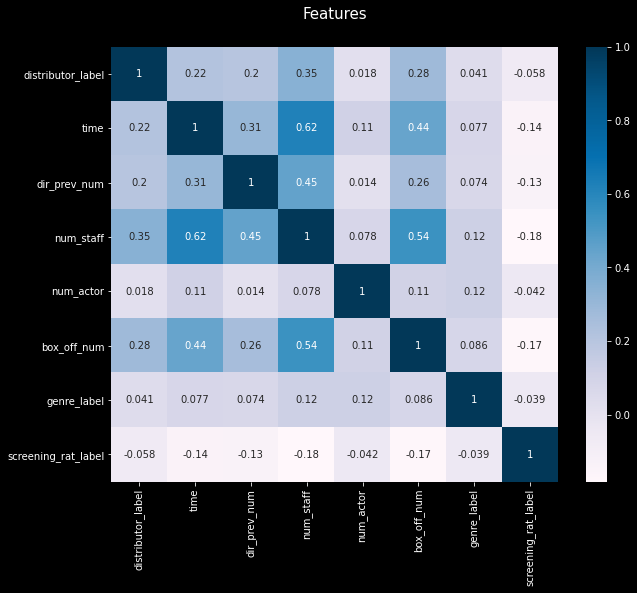

In [39]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Features", y = 1.05, size = 15)
plt.style.use(['dark_background'])
sns.heatmap(drop_data.corr(), cmap = colormap,annot=True,)

#### 데이터 저장

In [40]:
drop_data.to_csv("data/moives_train_preprocessing.csv", index = False)

In [41]:
df = pd.read_csv("data/moives_train_preprocessing.csv")

In [42]:
df

,rls_time_label,distributor_label,time,dir_prev_num,num_staff,num_actor,box_off_num,genre_label,screening_rat_label
0,2012,24,96,0,91,2,23398,10,3
1,2015,21,130,2,387,3,7072501,2,3
2,2013,21,123,4,343,4,6959083,10,1
3,2012,23,101,2,20,6,217866,11,2
4,2010,0,108,1,251,2,483387,11,1
...,...,...,...,...,...,...,...,...,...
595,2014,23,111,1,510,7,1475091,4,3
596,2013,21,127,1,286,6,1716438,4,1
597,2010,22,99,0,123,4,2475,1,3
598,2015,25,102,0,431,4,2192525,2,1
